# GAN Results

In this notebook we will load the data which have been trained using GANs and we will train this model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
gan_df = pd.read_csv('data/generated_data_with_labels_v10.csv')

In [31]:
print(gan_df.shape)

(300000, 47)


In [32]:
pd.options.display.float_format = '{:.4f}'.format

In [33]:
gan_df.head()

,amount,day,month,year,weekofyear,is_weekend,day_of_week,quarter,daily_tx_count_of_recipient,daily_tx_count_of_sender,...,weekly_average_tx_count_of_recipient,weekly_average_tx_count_of_sender,weekly_average_tx_count_of_recipient_accNumber,monthly_average_tx_count_of_recipient,monthly_average_tx_count_of_sender,monthly_average_tx_count_of_recipient_accNumber,daily_average_tx_count_of_recipient,daily_average_tx_count_of_sender,daily_average_tx_count_of_recipient_accNumber,reported
0,-0.0023,0.6974,0.2200,0.0027,0.3116,0.0405,0.3772,0.6611,0.0015,0.0021,...,0.0043,-0.0000,0.0158,0.0006,0.0033,0.0081,-0.0020,-0.0006,-0.0013,0.0000
1,0.0005,0.1875,0.8018,0.0050,0.7437,-0.0909,0.2113,0.9991,0.0046,0.0039,...,-0.0039,-0.0040,-0.0003,0.0093,0.0081,0.0105,0.0124,0.0128,0.0173,0.0000
2,0.0006,0.3404,0.6583,0.0018,0.6399,0.0019,0.2535,0.9943,0.0032,0.0039,...,-0.0033,-0.0031,-0.0130,0.0031,0.0040,0.0053,0.0065,0.0116,0.0107,0.0000
3,0.0003,0.3823,0.7073,-0.0083,0.6401,0.9521,0.9914,0.9947,-0.0342,-0.0309,...,0.0563,0.0405,0.0546,0.0144,0.0086,0.0060,-0.0621,-0.0626,-0.0406,0.0000
4,-0.0090,0.1686,0.4478,-0.0002,0.3608,-0.0003,0.1924,0.9813,0.0226,0.0260,...,0.0871,0.0907,0.0868,0.0903,0.0835,0.0899,0.0866,0.0837,0.0956,0.0000


In [34]:
gan_df.columns

Index(['amount', 'day', 'month', 'year', 'weekofyear', 'is_weekend',
       'day_of_week', 'quarter', 'daily_tx_count_of_recipient',
       'daily_tx_count_of_sender', 'daily_tx_count_of_recipient_accNumber',
       'weekly_tx_count_of_recipient', 'weekly_tx_count_of_sender',
       'weekly_tx_count_of_recipient_accNumber',
       'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender',
       'monthly_tx_count_of_recipient_accNumber',
       'recipient_acc_per_recipient_name', 'sender_per_recipient_name',
       'weekly_tx_amount_of_recipient', 'weekly_tx_amount_of_sender',
       'weekly_tx_amount_of_recipient_accNumber',
       'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender',
       'monthly_tx_amount_of_recipient_accNumber',
       'daily_tx_amount_of_recipient', 'daily_tx_amount_of_sender',
       'daily_tx_amount_of_recipient_accNumber',
       'weekly_average_tx_amount_of_recipient',
       'weekly_average_tx_amount_of_sender',
       'weekly_average_tx_amo

In [35]:
gan_df['amount']

0        -0.0023
1         0.0005
2         0.0006
3         0.0003
4        -0.0090
           ...  
299995   -0.0019
299996    0.0037
299997   -0.0036
299998    0.0024
299999    0.0027
Name: amount, Length: 300000, dtype: float64

In [36]:
gan_df['scaled_amount'] = StandardScaler().fit_transform(gan_df['amount'].values.reshape(-1, 1))

In [37]:
print(gan_df.columns)

Index(['amount', 'day', 'month', 'year', 'weekofyear', 'is_weekend',
       'day_of_week', 'quarter', 'daily_tx_count_of_recipient',
       'daily_tx_count_of_sender', 'daily_tx_count_of_recipient_accNumber',
       'weekly_tx_count_of_recipient', 'weekly_tx_count_of_sender',
       'weekly_tx_count_of_recipient_accNumber',
       'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender',
       'monthly_tx_count_of_recipient_accNumber',
       'recipient_acc_per_recipient_name', 'sender_per_recipient_name',
       'weekly_tx_amount_of_recipient', 'weekly_tx_amount_of_sender',
       'weekly_tx_amount_of_recipient_accNumber',
       'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender',
       'monthly_tx_amount_of_recipient_accNumber',
       'daily_tx_amount_of_recipient', 'daily_tx_amount_of_sender',
       'daily_tx_amount_of_recipient_accNumber',
       'weekly_average_tx_amount_of_recipient',
       'weekly_average_tx_amount_of_sender',
       'weekly_average_tx_amo

In [38]:
len(gan_df.columns)

48

## Train

In [39]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(46, 23),  # Encode_1: 46 -> 24
            nn.Tanh(),
            nn.Linear(23, 12),  # Encode_2: 23 -> 12
            nn.ReLU(),
            nn.Linear(12, 6),  # Encode_3: 12 -> 6
            nn.LeakyReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),  # Decode_1: 6 -> 12
            nn.Tanh(),
            nn.Linear(12, 23),  # Decode_2: 12 -> 23
            nn.ReLU(),
            nn.Linear(23, 46),  # Decode_3: 23 -> 46
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [40]:
gan_df['reported'].replace({True: 1, False: 0}, inplace=True)

In [41]:
print(gan_df['reported'].value_counts())

0.0000    297000
1.0000      3000
Name: reported, dtype: int64


In [42]:
input_columns = ['scaled_amount', 'day', 'month', 'year', 'weekofyear', 'is_weekend', 'day_of_week', 'quarter', 'daily_tx_count_of_recipient', 'daily_tx_count_of_sender',
    'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient', 'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber',
    'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender', 'monthly_tx_count_of_recipient_accNumber','recipient_acc_per_recipient_name',
    'sender_per_recipient_name', 'weekly_tx_amount_of_recipient', 'weekly_tx_amount_of_sender', 'weekly_tx_amount_of_recipient_accNumber',
    'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender', 'monthly_tx_amount_of_recipient_accNumber','daily_tx_amount_of_recipient', 
    'daily_tx_amount_of_sender', 'daily_tx_amount_of_recipient_accNumber', 'weekly_average_tx_amount_of_recipient', 'weekly_average_tx_amount_of_sender',
    'weekly_average_tx_amount_of_recipient_accNumber', 'monthly_average_tx_amount_of_recipient', 'monthly_average_tx_amount_of_sender',
    'monthly_average_tx_amount_of_recipient_accNumber', 'daily_average_tx_amount_of_recipient', 'daily_average_tx_amount_of_sender',
    'daily_average_tx_amount_of_recipient_accNumber', 'weekly_average_tx_count_of_recipient', 'weekly_average_tx_count_of_sender',
    'weekly_average_tx_count_of_recipient_accNumber', 'monthly_average_tx_count_of_recipient', 'monthly_average_tx_count_of_sender',
    'monthly_average_tx_count_of_recipient_accNumber', 'daily_average_tx_count_of_recipient', 'daily_average_tx_count_of_sender',
    'daily_average_tx_count_of_recipient_accNumber']

In [43]:
# do train test split 
from sklearn.model_selection import train_test_split

X = gan_df[input_columns]
y = gan_df['reported']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)

In [17]:
X_normal_train = X_train[y_train == 0]

In [18]:
print(y_test.value_counts(normalize=True))

0.0000   0.9900
1.0000   0.0100
Name: reported, dtype: float64


In [19]:
train_tensor = torch.tensor(X_normal_train.values, dtype=torch.float32)
test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

lambda_reg = 1e-3

# Model initialization
model = Autoencoder()

# Choice of loss
loss_type = 'MSE'  # Choose between 'MSE' and 'BCE'
if loss_type == 'MSE':
    criterion = nn.MSELoss()  # Mean squared error loss
else:
    criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss. Use if you have a sigmoid activation in the output layer.

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001, weight_decay=lambda_reg)  #  torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping setup
best_loss = float('inf')
patience = 10
epochs_without_improvement = 0

# Training loop with early stopping
num_epochs = 100

loss_values = []
test_loss_values = []
reconstruction_errors = []

In [20]:

for epoch in range(num_epochs):
    reconstruction_errors = []
    epoch_loss = 0.0
    for batch in train_dataloader:
        inputs = batch[0]

        # Zero the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        mse_loss = criterion(outputs, inputs)
        
        # 3. Activity Regularizer
        # Assuming the first layer of the encoder is model.encoder[0]
        activity_regularizer = lambda_reg * torch.norm(model.encoder[0](inputs), 1)
        
        # Combining the regularized loss
        total_loss = mse_loss + activity_regularizer

        # Backward pass and optimization
        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
    
    epoch_loss = epoch_loss / len(train_dataloader)

    # Save the loss value for plotting
    loss_values.append(epoch_loss)

    # Test the model
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for batch in test_dataloader:
            inputs = batch[0]
            outputs = model(inputs)
            mse_loss = criterion(outputs, inputs)
            test_loss += mse_loss.item()

            batch_errors = torch.sum((outputs - inputs) ** 2, dim=1).numpy() # Sum of squared differences for each sample
            reconstruction_errors.extend(batch_errors)

        test_loss = test_loss / len(test_dataloader)
        test_loss_values.append(test_loss)

    model.train()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}")


    # Early stopping check
    if epoch_loss + 1e-5 < best_loss:
        best_loss = epoch_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement == patience:
        print("Early stopping due to no improvement in loss.")
        break

Epoch [1/100], Train Loss: 0.1218, Test Loss: 0.0542
Epoch [2/100], Train Loss: 0.0601, Test Loss: 0.0497
Epoch [3/100], Train Loss: 0.0454, Test Loss: 0.0492
Epoch [4/100], Train Loss: 0.0395, Test Loss: 0.0492
Epoch [5/100], Train Loss: 0.0381, Test Loss: 0.0488
Epoch [6/100], Train Loss: 0.0373, Test Loss: 0.0487
Epoch [7/100], Train Loss: 0.0369, Test Loss: 0.0487
Epoch [8/100], Train Loss: 0.0368, Test Loss: 0.0487
Epoch [9/100], Train Loss: 0.0345, Test Loss: 0.0412
Epoch [10/100], Train Loss: 0.0229, Test Loss: 0.0295
Epoch [11/100], Train Loss: 0.0148, Test Loss: 0.0260
Epoch [12/100], Train Loss: 0.0137, Test Loss: 0.0259
Epoch [13/100], Train Loss: 0.0136, Test Loss: 0.0259
Epoch [14/100], Train Loss: 0.0135, Test Loss: 0.0259
Epoch [15/100], Train Loss: 0.0135, Test Loss: 0.0259
Epoch [16/100], Train Loss: 0.0134, Test Loss: 0.0259
Epoch [17/100], Train Loss: 0.0134, Test Loss: 0.0259
Epoch [18/100], Train Loss: 0.0134, Test Loss: 0.0259
Epoch [19/100], Train Loss: 0.0134, T

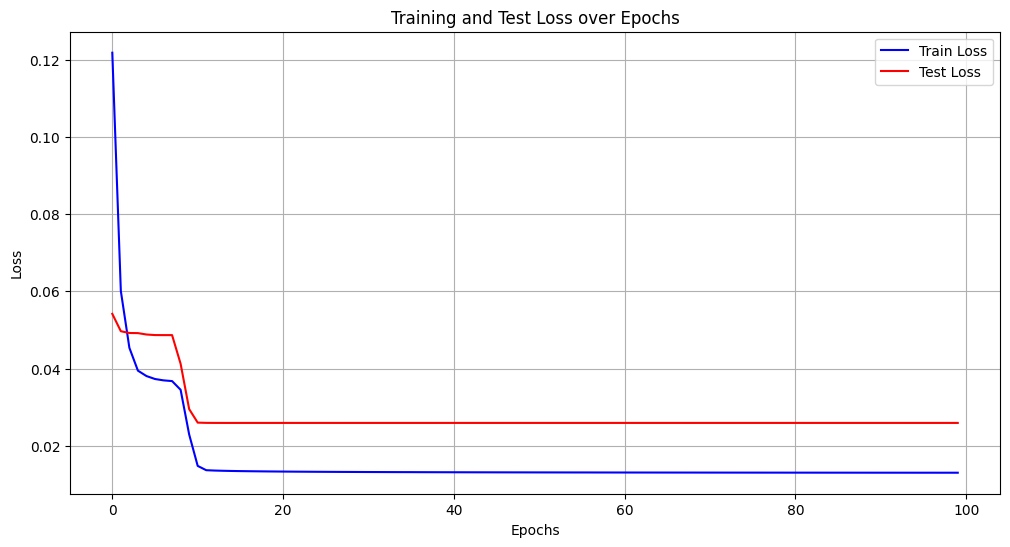

In [21]:
# Plotting the training and test losses
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label="Train Loss", color="blue")
plt.plot(test_loss_values, label="Test Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

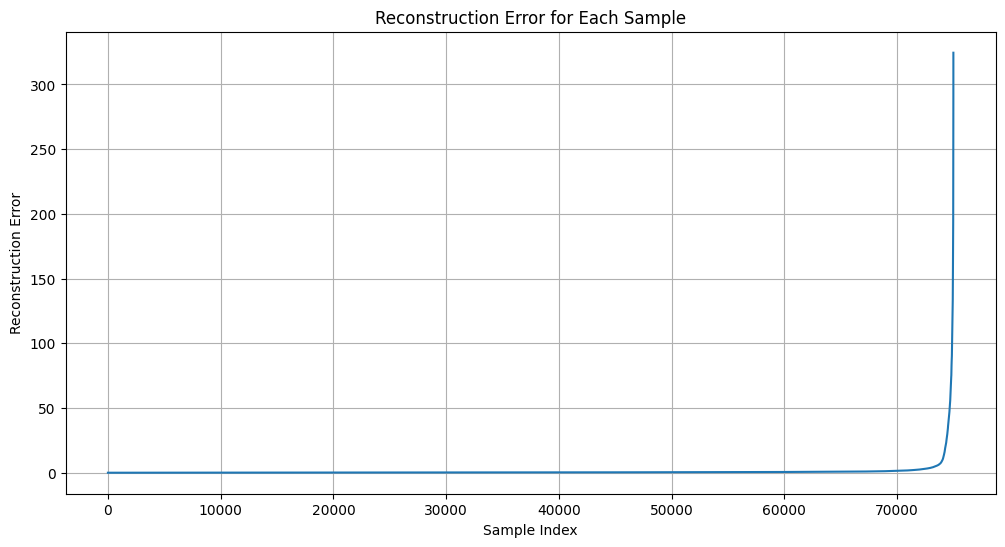

In [22]:
# sort and plot the reconstruction errors
reconstruction_errors.sort()
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors)
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Each Sample")
plt.grid(True)

## Evaluation

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve

# Reconstruct the test data
with torch.no_grad():
    reconstructed_test = model(test_tensor).numpy()

In [24]:
# Calculate reconstruction error
reconstruction_errors = np.mean(np.power(X_test - reconstructed_test, 2), axis=1)

# Choose a threshold based on domain knowledge, the distribution of reconstruction errors, or via a validation set.
threshold = np.percentile(reconstruction_errors, 99)  # e.g., 99th percentile as threshold. This is a naive approach; refine based on your needs.

# Convert reconstruction errors into binary labels (0 or 1)
predicted_labels = [1 if error > threshold else 0 for error in reconstruction_errors]

# Convert reconstruction errors into probabilities between 0 and 1
predicted_probabilities = (reconstruction_errors - min(reconstruction_errors)) / (max(reconstruction_errors) - min(reconstruction_errors))

# Assuming df has a 'reported' column with true labels
true_labels = gan_df['reported'].loc[X_test.index].values

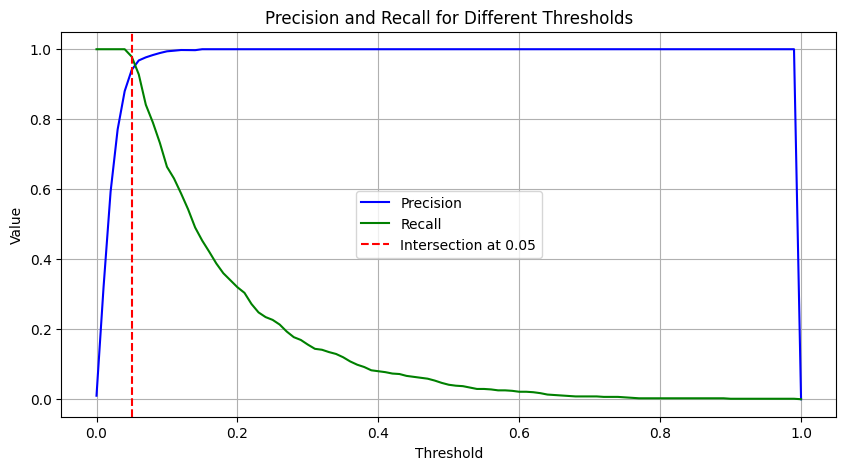

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Assuming the other parts of your code, where you compute `predicted_probabilities` and `true_labels`, are above this

# List to store precision and recall values for each threshold
precisions = []
recalls = []

# Iterate over a range of thresholds (e.g., from 0 to 1 with a step of 0.01)
thresholds = np.arange(0, 1.01, 0.01)  # Adjust the range and step as needed

for threshold in thresholds:
    # Calculate predicted labels for this threshold
    predicted_labels_threshold = [1 if error > threshold else 0 for error in predicted_probabilities]
    
    # Avoiding a scenario where there's a perfect precision or recall which can cause "UndefinedMetricWarning"
    if len(np.unique(predicted_labels_threshold)) > 1:
        # Compute precision and recall
        precision = precision_score(true_labels, predicted_labels_threshold)
        recall = recall_score(true_labels, predicted_labels_threshold)
    else:
        precision, recall = 0, 0

    precisions.append(precision)
    recalls.append(recall)

# Find the threshold where precision and recall cross
diffs = np.array(precisions) - np.array(recalls)
cross_points = np.where(np.diff(np.sign(diffs)))[0]  # Where the difference changes sign

# Plot
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')

# If there's an intersection point, plot it
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]
    plt.axvline(x=cross_threshold, color='red', linestyle='--', label=f'Intersection at {cross_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


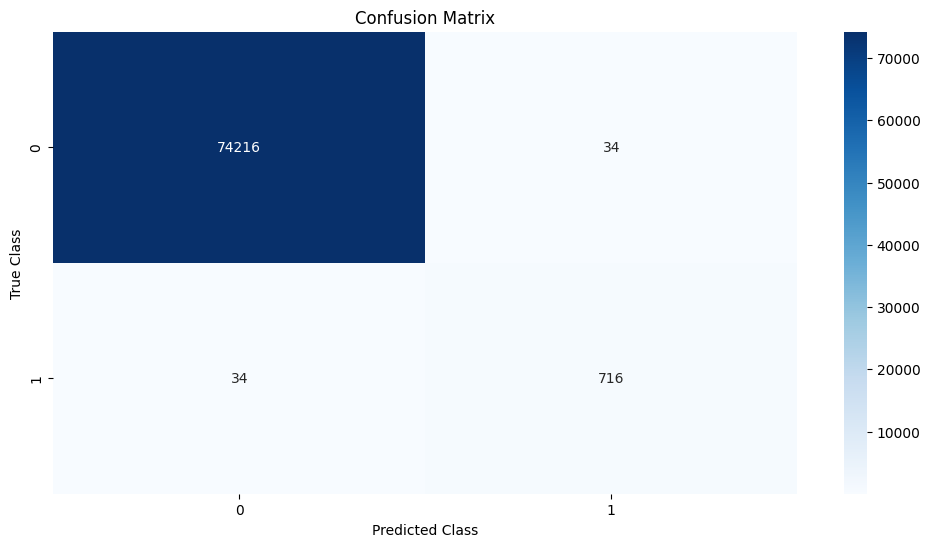

In [26]:
# heatmap of confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [27]:
normal_train_tensor = torch.tensor(X_normal_train.values, dtype=torch.float32)
with torch.no_grad():
    reconstructed_normal_train = model(normal_train_tensor).numpy()
normal_reconstruction_errors = np.mean(np.power(X_normal_train - reconstructed_normal_train, 2), axis=1)

# to dataframe
normal_reconstruction_errors_df = pd.DataFrame(normal_reconstruction_errors, columns=['reconstruction_error'])

In [28]:
normal_reconstruction_errors.describe()

count   222750.0000
mean         0.0130
std          0.0243
min          0.0023
25%          0.0042
50%          0.0073
75%          0.0128
max          1.0084
dtype: float64

In [29]:
# find test error distribution

test_reconstruction_errors = pd.DataFrame(reconstruction_errors, columns=['reconstruction_error'])

test_reconstruction_errors.describe()


,reconstruction_error
count,75000.0000
mean,0.0259
std,0.1632
min,0.0024
25%,0.0042
50%,0.0075
75%,0.0130
max,7.0535
